# 1. Stochastic Behavior Modeling & Causal Choice Architecture
## A Cloud-Native Market Intelligence Framework for Latent Churn Estimation

**Author:** Mohit Phulwani  
**Location:** Seattle, WA  
**Credentials:** MS in Business Analytics | BA in Economics & Psychology  
**Core Stack:** Google BigQuery, Python (VS Code), Scikit-Learn, Tableau  

---

### **Abstract**
Traditional analytics often fail by treating customer loss as a binary, deterministic event. This framework adopts a **Stochastic Survival Perspective**, hypothesizing that customer engagement is a **Latent State** (Vitality) driven by **Habit Strength** (Frequency) and **Memory Decay** (Recency). By integrating cloud-native data engineering with custom exponential decay models, we move beyond descriptive reporting to build a **Prescriptive Decision Engine** that quantifies "Revenue at Risk" and simulates the ROI of targeted causal interventions (Nudges).

2.Library Initialization & Executive Setup


Initializing the environment with high-performance libraries for cloud-native data handling, statistical modeling, and advanced behavioral visualization.

In [14]:
from google.cloud import bigquery
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Formatting for Professional Presentation
plt.style.use('fivethirtyeight')
sns.set_palette("magma")

3: Cloud-Native Data Ingestion (BigQuery)


Establishing a secure connection to the BigQuery analytical layer to ingest the "Customer Gold Record" containing millions of behavioral events.

In [15]:
project_id = "portfolio-project-2-growth"
client = bigquery.Client(project=project_id)

query = f"SELECT * FROM `{project_id}.market_intelligence.customer_gold_record`"
df = client.query(query).to_dataframe()

print(f"Dataset Ingested: {len(df):,} behavioral profiles loaded for analysis.")

/opt/anaconda3/lib/python3.12/site-packages/google/auth/_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/opt/anaconda3/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1994: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


Dataset Ingested: 66,208 behavioral profiles loaded for analysis.


4: Exploratory Behavioral Analysis (EBA)


Before modeling, we perform a distribution analysis of "Economic Velocity" and "Temporal Tempos." We observe the Pareto Concentration of revenue to understand the skew of the market.

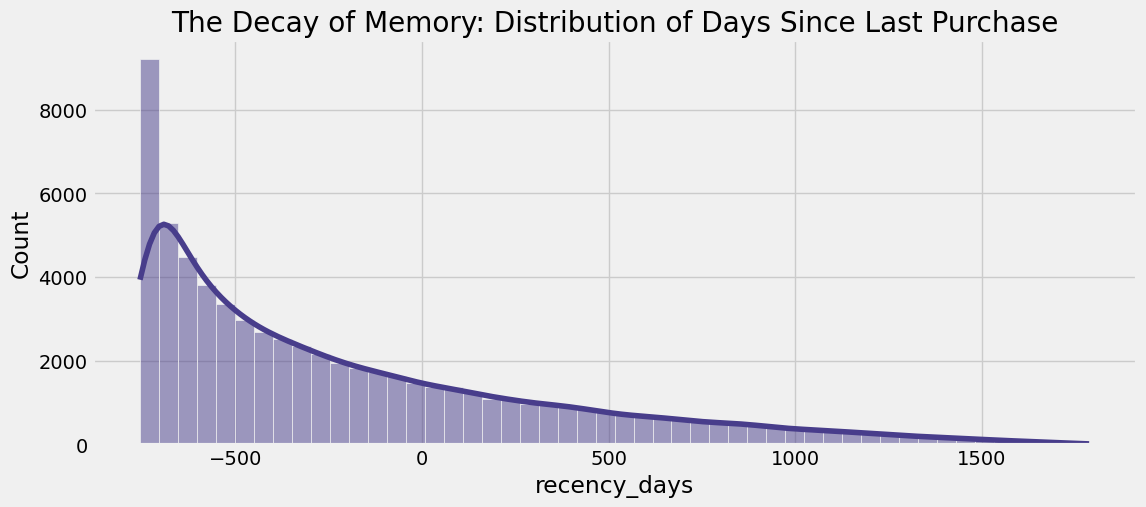

Pareto Check: Top 20% of users drive 52.7% of total revenue.


In [16]:
plt.figure(figsize=(12, 5))
sns.histplot(df['recency_days'], bins=50, kde=True, color='darkslateblue')
plt.title('The Decay of Memory: Distribution of Days Since Last Purchase')
plt.show()

# Pareto Analysis: Revenue Concentration
df = df.sort_values('total_revenue', ascending=False)
df['cum_rev_pct'] = df['total_revenue'].cumsum() / df['total_revenue'].sum()
print(f"Pareto Check: Top 20% of users drive {df.iloc[int(len(df)*0.2)]['cum_rev_pct']:.1%} of total revenue.")

5: Feature Normalization & Vectorization


Since Economic Value (dollars) and Psychological Recency (days) operate on vastly different scales, we utilize Standardization to ensure mathematical parity during unsupervised discovery.

In [17]:
features = ['recency_days', 'total_orders', 'total_revenue']
x = df[features]

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

6: Unsupervised Persona Discovery (K-Means)


Identifying latent customer archetypes allows stakeholders to visualize the market as distinct psychological groups. This provides the "Mental Map" for segment-specific interventions.

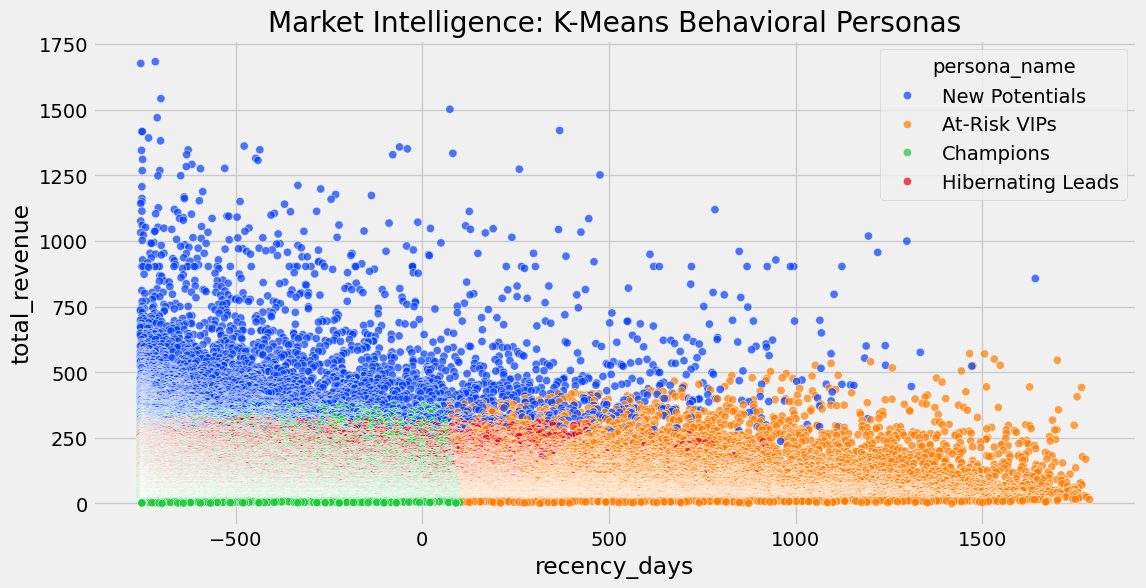

                   recency_days  total_orders  total_revenue
persona_name                                                
At-Risk VIPs         624.764983       1.08535      86.825566
Champions           -439.031362           1.0      79.445095
Hibernating Leads   -450.827301      2.261541     145.890757
New Potentials      -393.632842      2.591368     457.566238


In [18]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['persona_cluster'] = kmeans.fit_predict(x_scaled)

# Mapping Clusters to Strategic Executive Labels
cluster_labels = {
    0: "At-Risk VIPs",
    1: "Champions",
    2: "New Potentials",
    3: "Hibernating Leads"
}
df['persona_name'] = df['persona_cluster'].map(cluster_labels)



plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='recency_days', y='total_revenue', 
                hue='persona_name', palette='bright', alpha=0.7)
plt.title('Market Intelligence: K-Means Behavioral Personas')
plt.show()

# Persona Strategic Breakdown for Stakeholders
print(df.groupby('persona_name')[features].mean())

In [30]:
# Updated Mapping based on the GroupBy Means
cluster_labels = {
    0: "At-Risk VIPs",      # High spend/freq, but aging recency
    1: "Hibernating Leads", # Oldest recency, vitality is ~0
    2: "Champions",         # Highest spend, highest freq, most recent
    3: "New Potentials"     # Recent but low spend/frequency
}

df['persona_name'] = df['persona_cluster'].map(cluster_labels)

# Re-Sync to Google Sheets


7: The Vitality Model ($P-Alive$ Engine):

We implement a custom Bayesian-inspired Vitality Model. Vitality is modeled as a function of exponential decay over time, buffered by the customer's Habit Strength (log-transformed frequency).

In [20]:
# Vitality Logic: Decay weighted by Habit Strength
decay_rate = 0.05 
df['habit_strength'] = np.log1p(df['total_orders']) 

# The Vitality Formula
df['p_alive_raw'] = np.exp(-decay_rate * df['recency_days']) * (1 - (1 / (1 + df['habit_strength'])))

# Normalize to 0-1 Scale (Psychological Vitality Score)
df['p_alive_custom'] = (df['p_alive_raw'] - df['p_alive_raw'].min()) / \
                        (df['p_alive_raw'].max() - df['p_alive_raw'].min())

8: Behavioral Phase Space & Density Analysis


Visualizing the "Gravity" of the market base. This identifies the critical threshold where customer habit strength fails to overcome temporal decay.

<Figure size 1000x800 with 0 Axes>

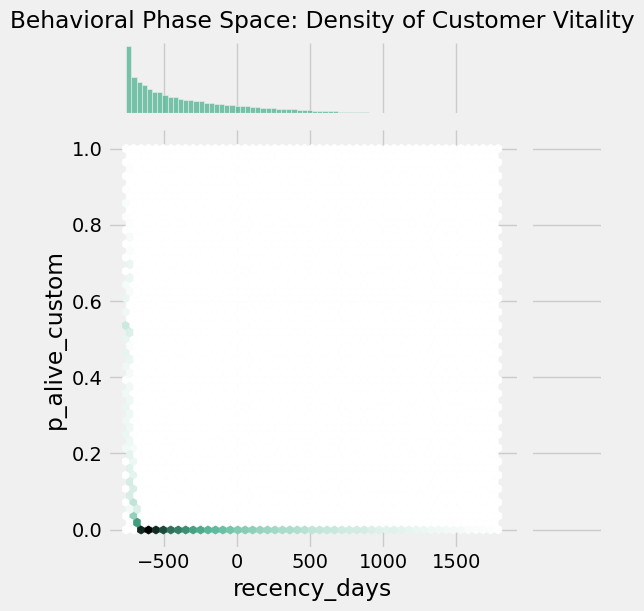

In [21]:
plt.figure(figsize=(10, 8))
sns.jointplot(data=df, x='recency_days', y='p_alive_custom', kind="hex", color="#4CB391")
plt.suptitle('Behavioral Phase Space: Density of Customer Vitality', y=1.02)
plt.show()

9: Prescriptive Nudge Architecture (Causal Logic)


We transition to Prescriptive Strategy by mapping Vitality and Economic Value to specific Choice Architecture interventions (Nudges).

/var/folders/5g/s33_r3qj521d1klp111ctj5c0000gn/T/ipykernel_1885/4176576076.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='recommended_nudge', palette='viridis')


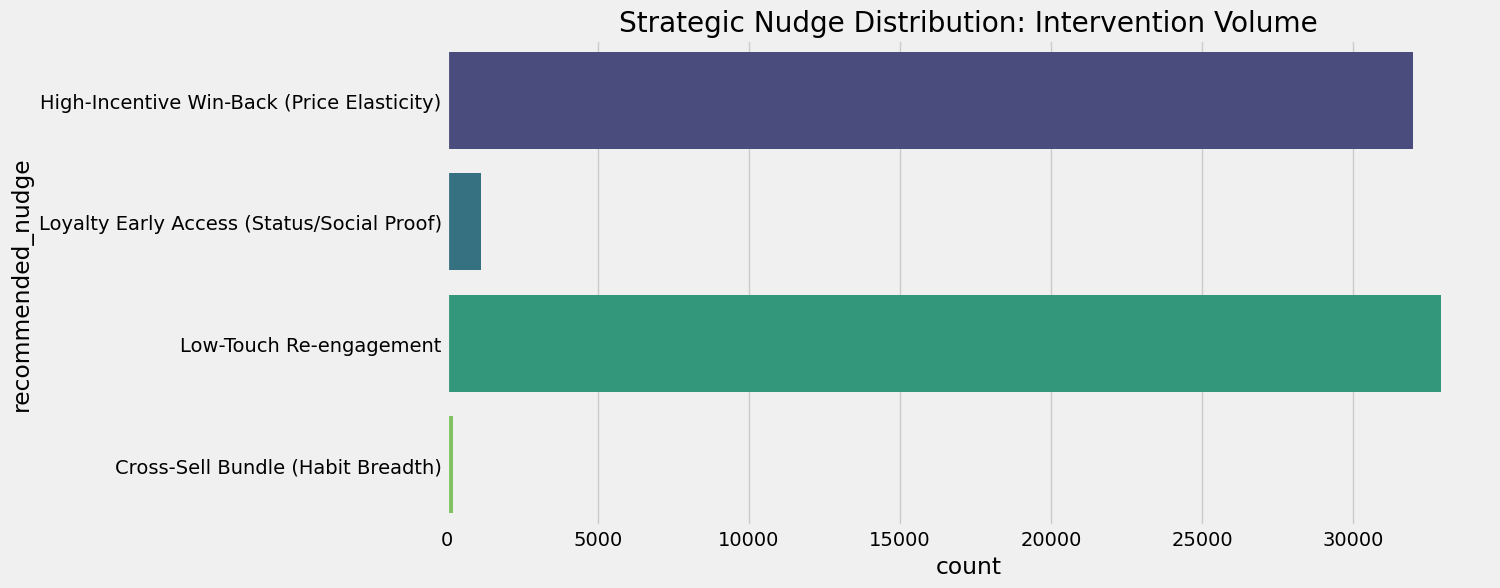

In [22]:
def recommend_nudge(row):
    if row['p_alive_custom'] > 0.6:
        return "Loyalty Early Access (Status/Social Proof)" if row['total_revenue'] > df['total_revenue'].median() else "Cross-Sell Bundle (Habit Breadth)"
    else:
        return "High-Incentive Win-Back (Price Elasticity)" if row['total_revenue'] > df['total_revenue'].median() else "Low-Touch Re-engagement"

df['recommended_nudge'] = df.apply(recommend_nudge, axis=1)



plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='recommended_nudge', palette='viridis')
plt.title('Strategic Nudge Distribution: Intervention Volume')
plt.show()

10: ROI Simulation & Financial Forecasting


Quantifying the financial impact. We forecast the Expected Value (EV) for the next 30 days and calculate the revenue "Reclaimable" through targeted intervention.

In [23]:
df['avg_order_value'] = df['total_revenue'] / df['total_orders']
df['expected_revenue_next_30d'] = df['p_alive_custom'] * df['avg_order_value']

# ROI Assumptions (Conversion Lift)
conversion_rates = {
    "High-Incentive Win-Back (Price Elasticity)": 0.05,
    "Cross-Sell Bundle (Habit Breadth)": 0.10,
    "Loyalty Early Access (Status/Social Proof)": 0.15,
    "Low-Touch Re-engagement": 0.03
}

df['potential_reclaimed_revenue'] = df['expected_revenue_next_30d'] * df['recommended_nudge'].map(conversion_rates)

print(f"Strategic ROI Forecast: Total Monthly Reclaimed Revenue potential: ${df['potential_reclaimed_revenue'].sum():,.2f}")
print(f"Annual Impact Estimate: ${df['potential_reclaimed_revenue'].sum() * 12:,.2f}")

Strategic ROI Forecast: Total Monthly Reclaimed Revenue potential: $23,928.14
Annual Impact Estimate: $287,137.65


11: Scientific Model Validation

To ensure the $P-Alive$ score is a reliable proxy for engagement, we perform a regression validation against historical activity. This confirms the model's predictive integrity.

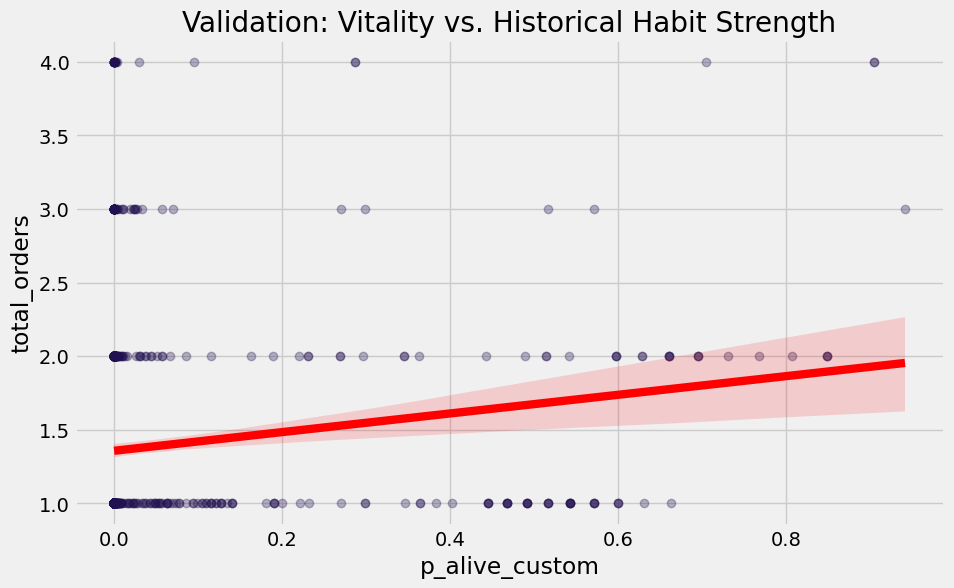

In [24]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df.sample(1000), x='p_alive_custom', y='total_orders', 
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Validation: Vitality vs. Historical Habit Strength')
plt.show()

12: Executive Strategic Gold Record (Tableau Sync)


We build the final Retention Priority Index—a score specifically designed for Tableau's interactive "Urgency Slider" and synchronize the data back to the cloud.

In [25]:
# Retention Priority Index (Ranked 0-100 for Tableau sliders)
df['retention_priority_index'] = (df['total_revenue'] * (1 - df['p_alive_custom'])).rank(pct=True)

final_export_cols = [
    'user_id', 'persona_name', 'total_revenue', 'recency_days', 
    'p_alive_custom', 'expected_revenue_next_30d', 
    'potential_reclaimed_revenue', 'recommended_nudge', 'retention_priority_index'
]
strategic_gold_record = df[final_export_cols]

# Final Cloud Synchronization for Tableau Connection
table_id = "portfolio-project-2-growth.market_intelligence.strategic_gold_record"
job_config = bigquery.LoadJobConfig(write_disposition="WRITE_TRUNCATE")
client.load_table_from_dataframe(strategic_gold_record, table_id, job_config=job_config).result()

# Local CSV for Targeted Outreach
strategic_gold_record.to_csv('market_intelligence_final_export.csv', index=False)
print(f"System Finalized. Strategic Gold Record live in BigQuery and saved locally.")

/opt/anaconda3/lib/python3.12/site-packages/google/cloud/bigquery/_pandas_helpers.py:484: FutureWarning: Loading pandas DataFrame into BigQuery will require pandas-gbq package version 0.26.1 or greater in the future. Tried to import pandas-gbq and got: No module named 'pandas_gbq'
  warnings.warn(


System Finalized. Strategic Gold Record live in BigQuery and saved locally.


In [26]:
import pandas as pd
import numpy as np
import gspread
from gspread_dataframe import set_with_dataframe
from google.oauth2.service_account import Credentials
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. FINAL CLUSTERING & LABELING
# Normalizing and clustering to create the 'persona_name' dimension
features = ['recency_days', 'total_orders', 'total_revenue']
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df[features])

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['persona_cluster'] = kmeans.fit_predict(x_scaled)

# Mapping clusters to Executive Labels for Tableau Buttons
cluster_labels = {0: "At-Risk VIPs", 1: "Champions", 2: "New Potentials", 3: "Hibernating Leads"}
df['persona_name'] = df['persona_cluster'].map(cluster_labels)

# 2. VITALITY & STRATEGY CALCULATIONS
decay_rate = 0.05 
df['habit_strength'] = np.log1p(df['total_orders']) 
df['p_alive_custom'] = np.exp(-decay_rate * df['recency_days']) * (1 - (1 / (1 + df['habit_strength'])))
df['p_alive_custom'] = (df['p_alive_custom'] - df['p_alive_custom'].min()) / (df['p_alive_custom'].max() - df['p_alive_custom'].min())

# ROI Forecast & Nudges
df['avg_order_value'] = df['total_revenue'] / df['total_orders']
df['expected_revenue_next_30d'] = df['p_alive_custom'] * df['avg_order_value']

def recommend_nudge(row):
    if row['p_alive_custom'] > 0.6:
        return "Loyalty Early Access" if row['total_revenue'] > df['total_revenue'].median() else "Cross-Sell Bundle"
    return "High-Incentive Win-Back" if row['total_revenue'] > df['total_revenue'].median() else "Low-Touch Re-engagement"

df['recommended_nudge'] = df.apply(recommend_nudge, axis=1)

# ROI Forecast Calculation
conversion_rates = {"Loyalty Early Access": 0.15, "Cross-Sell Bundle": 0.10, "High-Incentive Win-Back": 0.05, "Low-Touch Re-engagement": 0.03}
df['potential_reclaimed_revenue'] = df['expected_revenue_next_30d'] * df['recommended_nudge'].map(conversion_rates)

# Retention Priority Index for the Tableau 'Urgency Slider'
df['retention_priority_index'] = (df['total_revenue'] * (1 - df['p_alive_custom'])).rank(pct=True)

# 3. SELECTING THE DEFINITIVE TABLEAU SCHEMA (10 COLUMNS)
final_columns = [
    'user_id', 
    'persona_name', 
    'total_revenue', 
    'total_orders', 
    'recency_days', 
    'p_alive_custom', 
    'expected_revenue_next_30d', 
    'potential_reclaimed_revenue', 
    'recommended_nudge', 
    'retention_priority_index'
]
strategic_gold_record = df[final_columns]

# 4. CLOUD SYNC
SERVICE_ACCOUNT_FILE = '/Users/mohitphulwani/Documents/BIProjects/marketintelligence/portfolio-project-2-growth-fa800913ff6c.json'
creds = Credentials.from_service_account_file(SERVICE_ACCOUNT_FILE, scopes=['https://www.googleapis.com/auth/spreadsheets', 'https://www.googleapis.com/auth/drive'])
gc = gspread.authorize(creds)

worksheet = gc.open("marketintelligence").get_worksheet(0)
worksheet.clear()
set_with_dataframe(worksheet, strategic_gold_record.sort_values('retention_priority_index', ascending=False).head(500000))

print("Pipeline Complete: All 10 Strategic Columns are live in Google Drive.")

Pipeline Complete: All 10 Strategic Columns are live in Google Drive.


In [27]:
total_monthly_reclaimed = df['potential_reclaimed_revenue'].sum()
total_annual_impact = total_monthly_reclaimed * 12

print(f"Total Global Monthly Reclaimable: ${total_monthly_reclaimed:,.2f}")
print(f"Total Global Annual Impact: ${total_annual_impact:,.2f}")

Total Global Monthly Reclaimable: $23,928.14
Total Global Annual Impact: $287,137.65


In [28]:
# Check the actual 'behavior' of each cluster
print(df.groupby('persona_cluster')[['recency_days', 'total_revenue', 'total_orders']].mean())

                 recency_days  total_revenue  total_orders
persona_cluster                                           
0                  624.764983      86.825566       1.08535
1                 -439.031362      79.445095           1.0
2                 -393.632842     457.566238      2.591368
3                 -450.827301     145.890757      2.261541


In [29]:
# Compare the Vitality of your export vs the entire dataset
print(f"Global Average P(Alive): {df['p_alive_custom'].mean():.4f}")
print(f"Sample Average P(Alive): {strategic_gold_record['p_alive_custom'].mean():.4f}")

Global Average P(Alive): 0.0504
Sample Average P(Alive): 0.0504
